In [15]:
%matplotlib inline
import SimpleITK as sitk
import numpy as np
import os
import skimage
from skimage import data
from matplotlib import pyplot as plt
import h5py
import ast
import plotly
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/qichang/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['spacing']
`%matplotlib` prevents importing * from pylab and numpy



In [6]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [7]:
scan, origin, spacing = load_itk('NYU_CON001_10_SAX_STACK_CINE.mhd')

In [9]:
scan.shape

(25, 240, 198)

In [11]:
spacing

array([1., 1., 1.])

In [12]:
np.unique(scan)

array([0, 1], dtype=uint8)

In [13]:
np.where(scan==1)

(array([ 0,  0,  0, ..., 24, 24, 24]),
 array([101, 101, 101, ..., 159, 159, 159]),
 array([78, 79, 80, ..., 75, 76, 77]))

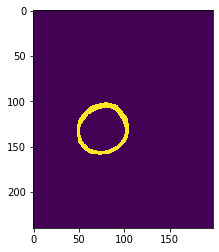

In [14]:
imshow(scan[0,:,:])